In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("./03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting ./03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


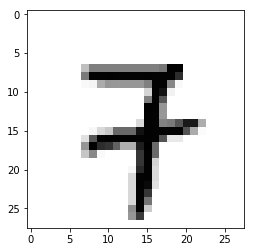

In [5]:
plt.imshow(mnist.train.images[14].reshape(28,28),cmap='Greys')

In [6]:
def generator(z,reuse=None):
    with tf.variable_scope('gen', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units = 128)
        
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        
        hidden2 = tf.layers.dense(inputs = hidden1, units = 128)
        
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        
        output = tf.layers.dense(hidden2, units = 784, activation=tf.nn.tanh)
        return output

In [7]:
def discriminator(X,reuse=None):
    with tf.variable_scope('dis', reuse=reuse):
        hidden1 = tf.layers.dense(inputs = X, units = 128)
        
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        
        hidden2 = tf.layers.dense(inputs = hidden1, units = 128)
        
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        
        logits = tf.layers.dense(hidden2, units = 1)
        output = tf.sigmoid(logits)
        return output, logits

In [8]:
real_images = tf.placeholder(tf.float32,[None, 784])
z = tf.placeholder(tf.float32,[None, 100])

In [9]:
G = generator(z)

In [10]:
D_output_real, D_logits_real = discriminator(real_images)

In [11]:
D_output_fake, D_logits_fake = discriminator(G,reuse = True)

In [13]:
#Loss
def loss_func(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in, labels=labels_in))
    

In [14]:
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9)#smoothing factor
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))

In [15]:
D_loss = D_real_loss + D_fake_loss

In [16]:
G_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_fake))

In [18]:
learning_rate = 0.001

In [20]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [21]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list = d_vars)

In [22]:
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list = g_vars)

In [23]:
d_vars

[<tf.Variable 'dis/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'dis/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dis/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'dis/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dis/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'dis/dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [24]:
batch_size = 100

In [25]:
epochs = 30

In [26]:
init = tf.global_variables_initializer()

In [34]:
samples = []

In [35]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        num_batches = mnist.train.num_examples//batch_size
        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images*2-1
            
            batch_z = np.random.uniform(-1,1,size = (batch_size, 100))
            
            _ = sess.run(D_trainer, feed_dict={real_images:batch_images,z:batch_z})#run the optimizer
            _ = sess.run(G_trainer, feed_dict={z:batch_z})#run the optimizer
            
        print("On epoch {}".format(epoch))
        
        
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z,reuse = True), feed_dict = {z:sample_z})
        
        samples.append(gen_sample)

On epoch 0
On epoch 1
On epoch 2
On epoch 3
On epoch 4
On epoch 5
On epoch 6
On epoch 7
On epoch 8
On epoch 9
On epoch 10
On epoch 11
On epoch 12
On epoch 13
On epoch 14
On epoch 15
On epoch 16
On epoch 17
On epoch 18
On epoch 19
On epoch 20
On epoch 21
On epoch 22
On epoch 23
On epoch 24
On epoch 25
On epoch 26
On epoch 27
On epoch 28
On epoch 29


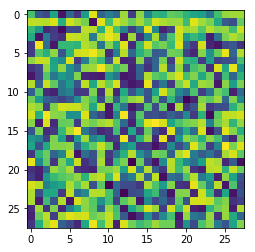

In [43]:
plt.imshow(samples[1].reshape(28,28))

In [44]:
saver = tf.train.Saver(var_list=g_vars)

In [46]:
new_samples = []
with tf.Session() as sess:
    saver.restore(sess, './06-Generative-Adversarial-Networks/models/500_epoch_model.ckpt')
    
    for x in range(5):
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z,reuse = True), feed_dict = {z:sample_z})
        new_samples.append(gen_sample)
        

INFO:tensorflow:Restoring parameters from ./06-Generative-Adversarial-Networks/models/500_epoch_model.ckpt


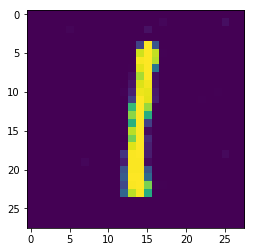

In [51]:
plt.imshow(new_samples[4].reshape(28,28))